Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)

In [55]:
#importamos las librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast

In [63]:
data = pd.read_csv("definido_movies_dataset copy.csv")

C:\Users\luisr\AppData\Local\Temp\ipykernel_7324\2603322724.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("definido_movies_dataset copy.csv")


# Analizamos la data 

In [65]:
data.shape

(45466, 20)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45466 non-null  int64  
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45463 non-null  float64
 3   genres                 45466 non-null  object 
 4   id                     45466 non-null  object 
 5   original_language      45455 non-null  object 
 6   overview               44512 non-null  object 
 7   popularity             45461 non-null  object 
 8   production_companies   45463 non-null  object 
 9   production_countries   45463 non-null  object 
 10  release_date           45376 non-null  object 
 11  revenue                45460 non-null  float64
 12  runtime                45203 non-null  float64
 13  spoken_languages       45460 non-null  object 
 14  status                 45379 non-null  object 
 15  ta

In [67]:
#visualizar outlier 
data.describe()

,Unnamed: 0,budget,revenue,runtime,vote_average,release_year,return
count,45466.000000,4.546300e+04,4.546000e+04,45203.000000,45460.000000,45376.000000,4.546300e+04
mean,22732.500000,4.224579e+06,1.120935e+07,94.128199,5.618207,1991.881193,6.587797e+02
std,13125.048006,1.742413e+07,6.433225e+07,38.407810,1.924216,24.055360,7.462180e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,11366.250000,0.000000e+00,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,22732.500000,0.000000e+00,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,34098.750000,0.000000e+00,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,45465.000000,3.800000e+08,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


In [68]:
data.isnull().sum().sort_values(ascending=False)

belongs_to_collection    40972
tagline                  25054
overview                   954
runtime                    263
release_date                90
release_year                90
status                      87
original_language           11
spoken_languages             6
vote_average                 6
title                        6
revenue                      6
popularity                   5
return                       3
production_countries         3
production_companies         3
budget                       3
id                           0
genres                       0
Unnamed: 0                   0
dtype: int64

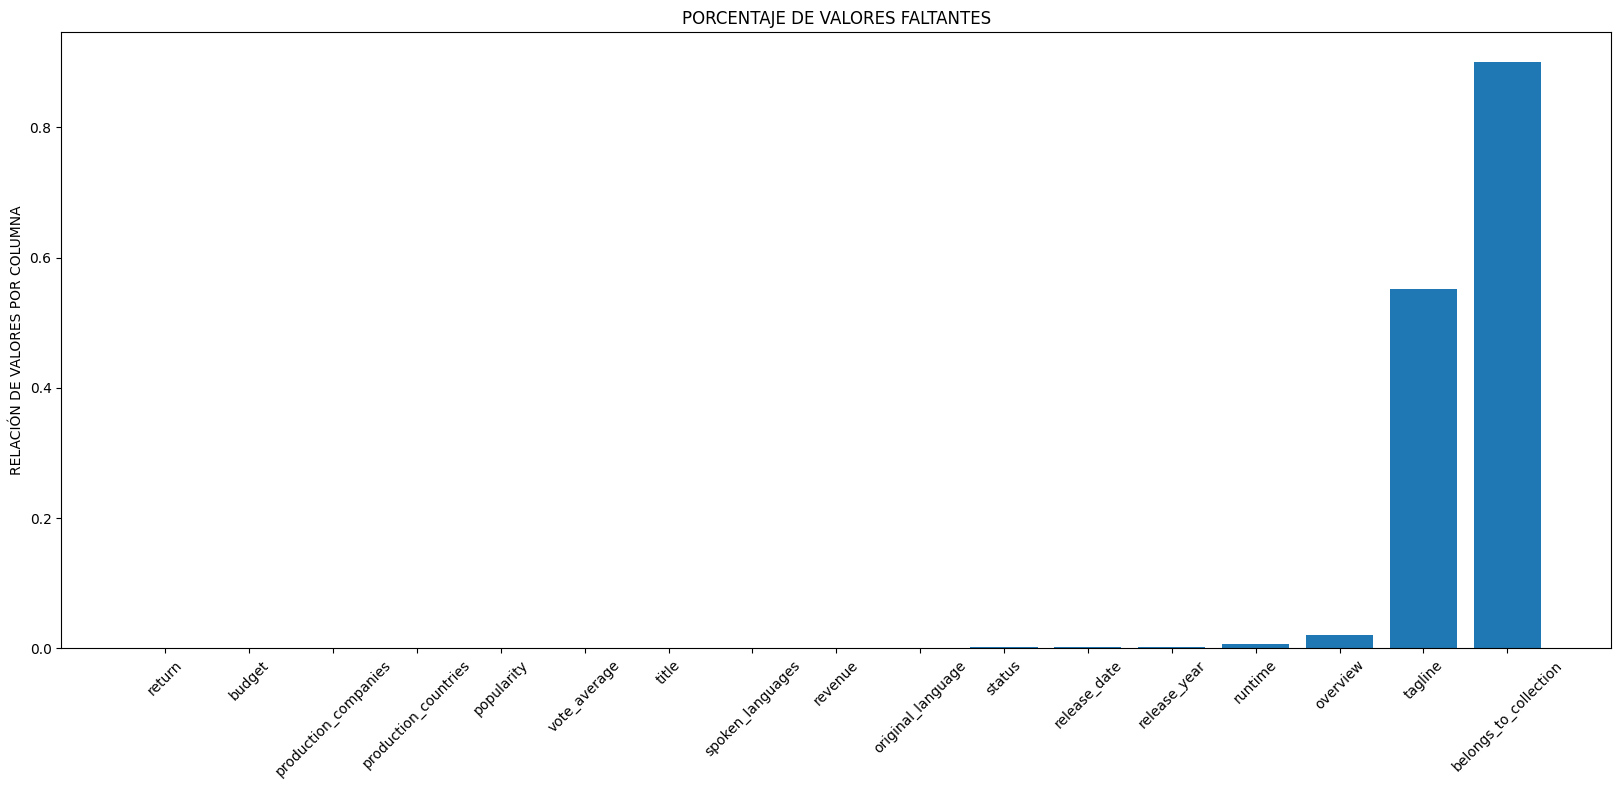

In [69]:
#graficamos los valores faltantes
mascara = data.isna().any(axis=0)

porcentaje = data.isna().mean()[mascara].sort_values()

plt.figure(figsize=(20,8))
plt.bar(x=porcentaje.index, height=porcentaje.values)
plt.title("PORCENTAJE DE VALORES FALTANTES")
plt.ylabel("RELACIÓN DE VALORES POR COLUMNA")
plt.xticks(rotation=45)
plt.show()

# Analizamos los valores atipicos

In [70]:
#cambiamos de la variable popularity
data["popularity"].fillna(0)
data["popularity"] = np.where((data["popularity"] == "Beware Of Frost Bites"), 0, data["popularity"])

data["popularity"] = data["popularity"].astype(float)

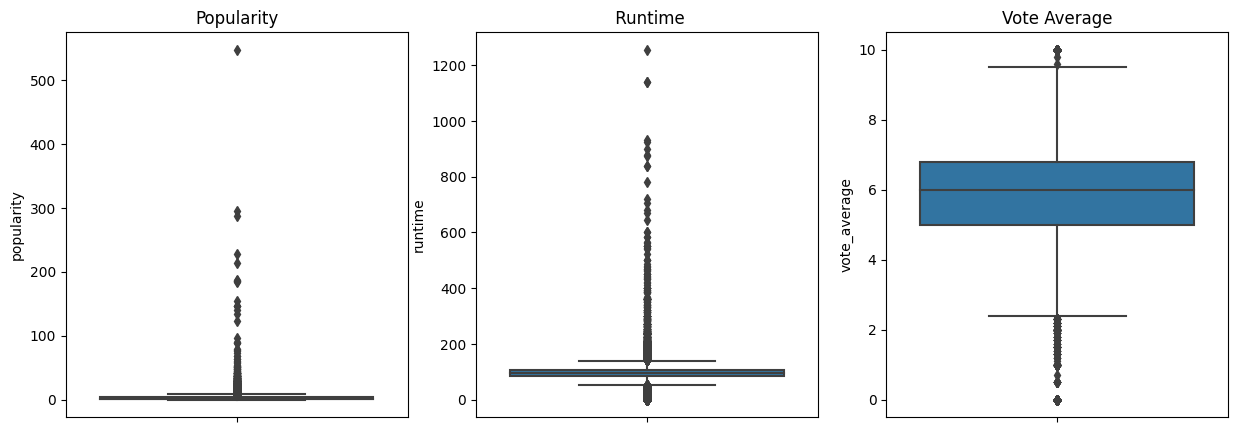

In [71]:
# Crear figura con tres subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


sns.boxplot(y='popularity', data=data, ax=axs[0])
axs[0].set_title('Popularity')


sns.boxplot(y='runtime', data=data, ax=axs[1])
axs[1].set_title(' Runtime')


sns.boxplot(y='vote_average', data=data, ax=axs[2])
axs[2].set_title('Vote Average')

# Mostrarmos la gráfico
plt.show()


Conclusion:
Se puede concluir que la mayoria de peliculas no son muy populares segun al distribucion del primer diagrama, tambien podemos ver que la duracion de la mayoria de peliculas esta dentro de un rango alredor de los 100 minutos y las calificaciones el tercer diagrama muestra que la mayoria de las peliculas tienen una calificacion promedio entre 5 y 8 

# Mapa de calor de la matriz de correlacion

<Axes: >

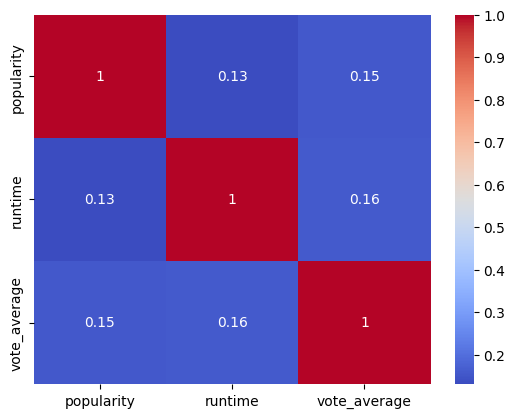

In [72]:
#selecionamos las columnas que vamos a evaluar
matriz_cor = data[["popularity", "runtime", "vote_average"]].corr()

#generamos la grafica

sns.heatmap(matriz_cor, annot=True, cmap="coolwarm")


Conclusion:

-Aqui podemos ver que aunque una pelicula sea muy popular no necesariamente 
tiene mejores o peores calificaciones que una pelicula menos popular 

-Tambien podemos ver que la duracion de una pelicula no tiene una influencia relevante a su popularidad

In [94]:
data["release_year"]

0        1995.0
1        1995.0
2        1995.0
3        1995.0
4        1995.0
          ...  
45461       NaN
45462    2011.0
45463    2003.0
45464    1917.0
45465    2017.0
Name: release_year, Length: 45466, dtype: float64

# Grafico de dispersion 

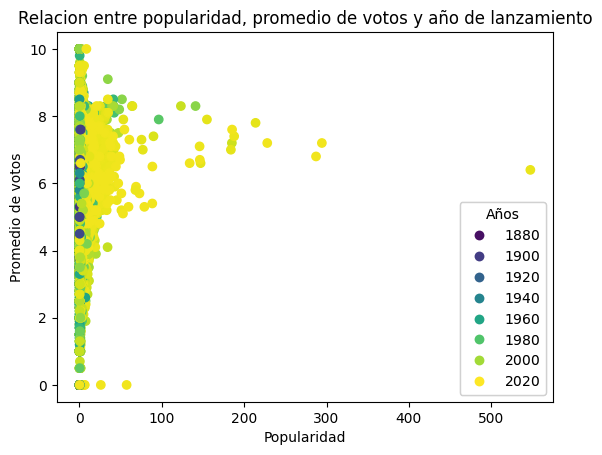

In [95]:
#declaramos las variables
x = data["popularity"]
y = data["vote_average"]
colors = data["release_year"]

#creamos la grafica
fig, ax = plt.subplots()
scatter = ax.scatter(x,y ,c=colors)

ax.set_xlabel("Popularidad")
ax.set_ylabel("Promedio de votos")
ax.set_title("Relacion entre popularidad, promedio de votos y año de lanzamiento")

#agregamos la barra de color 
legend = ax.legend(*scatter.legend_elements(),
                loc="lower right", title="Años")
ax.add_artist(legend)

plt.show()


Conclusion :
- El publico tiende a disfrutar mas las peliculas más nuevas, pero la popularidad no necesariamente se relaciona con la puntacion de votos mas alta
- Tambien podemos ver algunos valores atipicos, ya que hay algunas peliculas antiguas que tienen una calificacion mas alta que algunas peliculas mas recientes